In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error


In [20]:
# Step (a): Load & Preprocess Dataset
file_path = "Concrete_Data.xls"  # Ensure this file is in your working directory
data = pd.read_excel(file_path)

# Display first few rows to understand structure
print("Dataset Preview:")
print(data.head())


Dataset Preview:
   Cement (component 1)(kg in a m^3 mixture)  \
0                                      540.0   
1                                      540.0   
2                                      332.5   
3                                      332.5   
4                                      198.6   

   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
0                                                0.0       
1                                                0.0       
2                                              142.5       
3                                              142.5       
4                                              132.4       

   Fly Ash (component 3)(kg in a m^3 mixture)  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   

   Water  (component 4)(kg in a m^3 mi

In [21]:
# Identify independent variables (features) and dependent variable (target)
X = data.iloc[:, :-1].values  # All columns except last (features)
y = data.iloc[:, -1].values   # Last column (target: compressive strength)

# Check for missing values
if data.isnull().sum().sum() > 0:
    print("Missing values detected! Handling them appropriately.")
    data.fillna(data.mean(), inplace=True)  # Fill missing values with column means

# Split dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
# Step (b): Implement Linear Regression from Scratch
def linear_regression(X, y):
    """ Computes theta using the normal equation. """
    X_bias = np.c_[np.ones(X.shape[0]), X]  # Add bias term
    theta = np.linalg.inv(X_bias.T @ X_bias) @ X_bias.T @ y
    return theta

def predict(X, theta):
    """ Computes predictions using trained theta. """
    X_bias = np.c_[np.ones(X.shape[0]), X]  # Add bias term
    return X_bias @ theta

# Train Linear Regression Model
theta_lin = linear_regression(X_train, y_train)
y_pred_lin = predict(X_test, theta_lin)


Linear Regression MSE: 95.97548435337454
Linear Regression R²: 0.6275416055429118


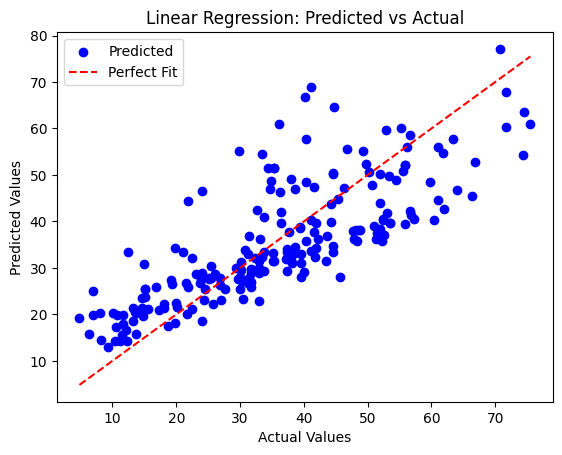

In [23]:
# Compute MSE and R² using formulas
mse_lin = np.mean((y_test - y_pred_lin) ** 2)
r2_lin = 1 - (np.sum((y_test - y_pred_lin) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2))

print("Linear Regression MSE:", mse_lin)
print("Linear Regression R²:", r2_lin)

# Plot Predicted vs Actual Values for Linear Regression
plt.scatter(y_test, y_pred_lin, color='blue', label='Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='dashed', label='Perfect Fit')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression: Predicted vs Actual")
plt.legend()
plt.show()

Degree 2 Polynomial Regression MSE: 58.27907452907879
Degree 2 Polynomial Regression R²: 0.773832550303952


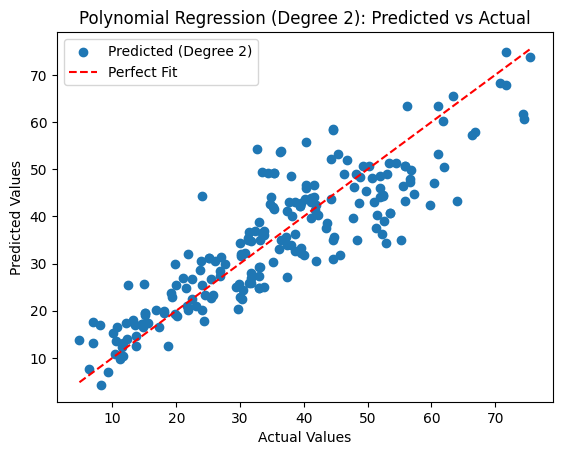

Degree 3 Polynomial Regression MSE: 47.68571704820056
Degree 3 Polynomial Regression R²: 0.8149428916147659


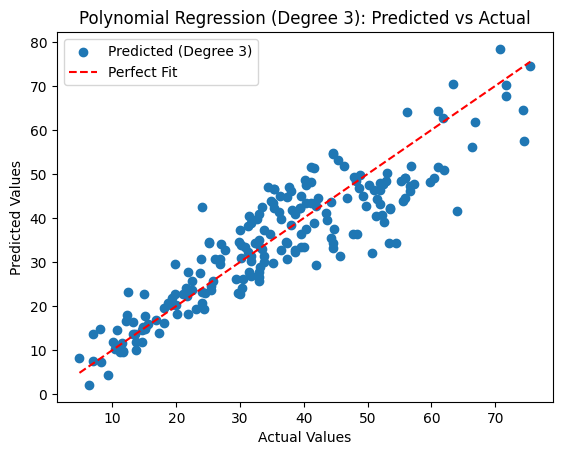

Degree 4 Polynomial Regression MSE: 38.17182549999971
Degree 4 Polynomial Regression R²: 0.8518640782590003


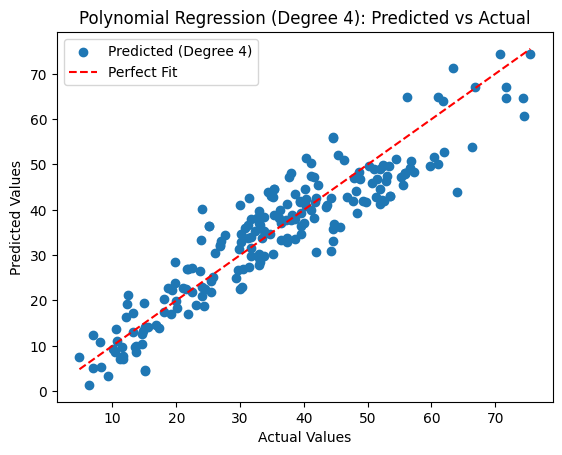

In [24]:
# Step (c): Implement Polynomial Regression for k = 2, 3, 4
def polynomial_features(X, degree):
    """ Manually computes polynomial features up to a given degree. """
    poly_features = [X**d for d in range(1, degree + 1)]
    return np.column_stack(poly_features)

# Iterate over different polynomial degrees
mse_poly = {}
r2_poly = {}

for degree in [2, 3, 4]:
    # Transform features
    X_train_poly = polynomial_features(X_train, degree)
    X_test_poly = polynomial_features(X_test, degree)

    # Train Polynomial Regression using normal equation
    theta_poly = linear_regression(X_train_poly, y_train)
    y_pred_poly = predict(X_test_poly, theta_poly)

    # Compute MSE and R²
    mse_poly[degree] = np.mean((y_test - y_pred_poly) ** 2)
    r2_poly[degree] = 1 - (np.sum((y_test - y_pred_poly) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2))

    print(f"Degree {degree} Polynomial Regression MSE:", mse_poly[degree])
    print(f"Degree {degree} Polynomial Regression R²:", r2_poly[degree])

    # Plot Predicted vs Actual Values
    plt.scatter(y_test, y_pred_poly, label=f'Predicted (Degree {degree})')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='dashed', label='Perfect Fit')
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title(f"Polynomial Regression (Degree {degree}): Predicted vs Actual")
    plt.legend()
    plt.show()


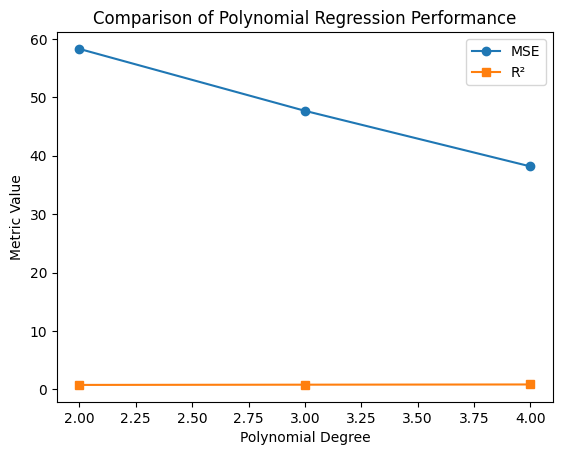

In [25]:

# Step (d): Visualizing & Comparing Results
plt.plot(mse_poly.keys(), mse_poly.values(), marker='o', label="MSE")
plt.plot(r2_poly.keys(), r2_poly.values(), marker='s', label="R²")
plt.xlabel("Polynomial Degree")
plt.ylabel("Metric Value")
plt.title("Comparison of Polynomial Regression Performance")
plt.legend()
plt.show()


# Bias-Variance Tradeoff Analysis
- Linear Regression has high bias and low variance.
- Higher-degree polynomial models (3, 4) have lower bias but may overfit.
The optimal balance is likely found at Degree 3.
- Higher-degree polynomials tend to overfit because they introduce unnecessary complexity, fitting noise instead of capturing the underlying trend.